In [14]:
import subprocess
import re

target_file = "./build/LinkedListProject.exe"

# Define m_fractions combinations and thread counts
m_fractions_list = [
    (0.99, 0.005, 0.005),
    (0.9, 0.05, 0.05),
    (0.5, 0.25, 0.25),
]

thread_counts = [1, 2, 4, 8]

# Initialize a dictionary to store results
results = {
    "Serial": {"avg": [], "std": []},
    "Mutex": {"avg": [], "std": []},
    "RWLock": {"avg": [], "std": []},
}

# Run for each combination of m_fractions and thread counts
for m_fractions in m_fractions_list:
    m_member, m_insert, m_delete = m_fractions

    # Create temporary lists to store the averages and std devs for each case
    serial_avg, mutex_avg, rwlock_avg = [], [], []
    serial_std, mutex_std, rwlock_std = [], [], []

    for threads in thread_counts:
        # Call the compiled program with the required arguments
        process = subprocess.Popen(
            [target_file, str(m_member), str(m_insert), str(m_delete), str(threads)],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
        )
        stdout, stderr = process.communicate()

        avg_times = []
        std_times = []

        # Extract times from the output
        for line in stdout.decode("utf-8").split("\n"):
            avg_pattern = r"Average time taken for .*?: ([\d.]+) seconds"
            std_pattern = r"Standard deviation for .*?: ([\d.]+) seconds"
            avg_match = re.match(avg_pattern, line)
            std_match = re.match(std_pattern, line)

            if avg_match:
                avg_times.append(float(avg_match.group(1)))
            if std_match:
                std_times.append(float(std_match.group(1)))

        # Append the results to the respective lists for each case
        if len(avg_times) == 3 and len(std_times) == 3:
            serial_avg.append(avg_times[0])
            mutex_avg.append(avg_times[1])
            rwlock_avg.append(avg_times[2])

            serial_std.append(std_times[0])
            mutex_std.append(std_times[1])
            rwlock_std.append(std_times[2])

    # Append the results for the current case (m_fractions)
    results["Serial"]["avg"].append(serial_avg)
    results["Serial"]["std"].append(serial_std)

    results["Mutex"]["avg"].append(mutex_avg)
    results["Mutex"]["std"].append(mutex_std)

    results["RWLock"]["avg"].append(rwlock_avg)
    results["RWLock"]["std"].append(rwlock_std)

# Print the results in the desired tabular format
def print_results(label, data):
    print(f"{label}\t1\t\t2\t\t4\t\t8")
    for i, case in enumerate(data["avg"]):
        print(f"case{i+1}\t", end="")
        for j in range(len(thread_counts)):
            print(f"{case[j]:.6f} {data['std'][i][j]:.6f}\t", end="")
        print()

print("Cases: case1 = 0.99, case2 = 0.9, case3 = 0.5\n")
print("Implementation\tNo of threads")
print_results("Serial", results["Serial"])
print_results("Mutex", results["Mutex"])
print_results("RWLock", results["RWLock"])


Cases: case1 = 0.99, case2 = 0.9, case3 = 0.5

Implementation	No of threads
Serial	1		2		4		8
case1	0.041958 0.006542	0.041577 0.008464	0.038527 0.004514	0.040803 0.009412	
case2	0.053418 0.007078	0.048771 0.007910	0.051766 0.008050	0.048951 0.004973	
case3	0.072595 0.010607	0.078922 0.015150	0.094966 0.033494	0.100281 0.027103	
Mutex	1		2		4		8
case1	0.041696 0.007086	0.063327 0.009420	0.069481 0.014180	0.071169 0.009621	
case2	0.053034 0.006115	0.077901 0.012620	0.079457 0.009774	0.081569 0.012634	
case3	0.072603 0.008715	0.112556 0.024800	0.152564 0.048895	0.116221 0.021932	
RWLock	1		2		4		8
case1	0.041652 0.004326	0.025719 0.004007	0.018852 0.007239	0.016675 0.003590	
case2	0.054478 0.007456	0.051130 0.008640	0.044636 0.006535	0.050457 0.010017	
case3	0.082631 0.015730	0.127556 0.023525	0.149740 0.027703	0.129249 0.027284	


In [19]:
import csv

# Function to save the results into a CSV file
def save_results_to_csv(filename, results, thread_counts):
    with open(filename, mode="w", newline="") as file:
        writer = csv.writer(file)

        # Write header
        writer.writerow(["Implementation", "Case", "Metric"] + [f"{threads} Threads" for threads in thread_counts])

        # Write rows for Serial
        for metric in ["avg", "std"]:
            for i, case in enumerate(results["Serial"][metric]):
                row = ["Serial", f"case{i+1}", metric.capitalize()]
                row += [f"{results['Serial'][metric][i][j]:.6f}" for j in range(len(thread_counts))]
                writer.writerow(row)

        # Write rows for Mutex
        for metric in ["avg", "std"]:
            for i, case in enumerate(results["Mutex"][metric]):
                row = ["Mutex", f"case{i+1}", metric.capitalize()]
                row += [f"{results['Mutex'][metric][i][j]:.6f}" for j in range(len(thread_counts))]
                writer.writerow(row)

        # Write rows for RWLock
        for metric in ["avg", "std"]:
            for i, case in enumerate(results["RWLock"][metric]):
                row = ["RWLock", f"case{i+1}", metric.capitalize()]
                row += [f"{results['RWLock'][metric][i][j]:.6f}" for j in range(len(thread_counts))]
                writer.writerow(row)

# Save the results to a CSV file
save_results_to_csv("operation_times_results.csv", results, thread_counts)


In [20]:
import csv

# Function to load the results from a CSV file
def load_results_from_csv(filename):
    results = {
        "Serial": {"avg": [], "std": []},
        "Mutex": {"avg": [], "std": []},
        "RWLock": {"avg": [], "std": []},
    }

    with open(filename, mode="r") as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row

        for row in reader:
            # row[0] is the operation (Serial, Mutex, RWLock)
            operation = row[0]
            # row[2] is the metric (Average or Std)
            metric = row[2].lower()

            # Convert the remaining columns to floats (times for each thread count)
            times = [float(x) for x in row[3:]]

            if operation in results:
                if metric == "avg":
                    results[operation]["avg"].append(times)
                elif metric == "std":
                    results[operation]["std"].append(times)

    return results

# Load the results from the CSV file
loaded_results = load_results_from_csv("operation_times_results.csv")

# Print the loaded results for verification
import pprint
pprint.pprint(loaded_results)


{'Mutex': {'avg': [[0.041696, 0.063327, 0.069481, 0.071169],
                   [0.053034, 0.077901, 0.079457, 0.081569],
                   [0.072603, 0.112556, 0.152564, 0.116221]],
           'std': [[0.007086, 0.00942, 0.01418, 0.009621],
                   [0.006115, 0.01262, 0.009774, 0.012634],
                   [0.008715, 0.0248, 0.048895, 0.021932]]},
 'RWLock': {'avg': [[0.041652, 0.025719, 0.018852, 0.016675],
                    [0.054478, 0.05113, 0.044636, 0.050457],
                    [0.082631, 0.127556, 0.14974, 0.129249]],
            'std': [[0.004326, 0.004007, 0.007239, 0.00359],
                    [0.007456, 0.00864, 0.006535, 0.010017],
                    [0.01573, 0.023525, 0.027703, 0.027284]]},
 'Serial': {'avg': [[0.041958, 0.041577, 0.038527, 0.040803],
                    [0.053418, 0.048771, 0.051766, 0.048951],
                    [0.072595, 0.078922, 0.094966, 0.100281]],
            'std': [[0.006542, 0.008464, 0.004514, 0.009412],
                 

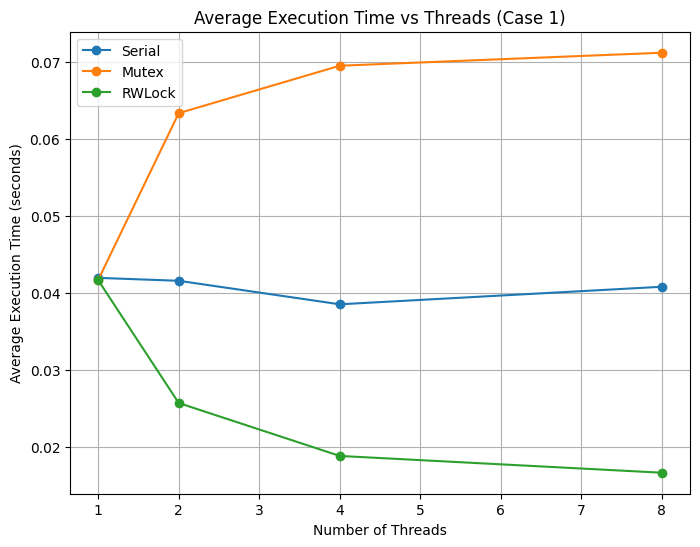

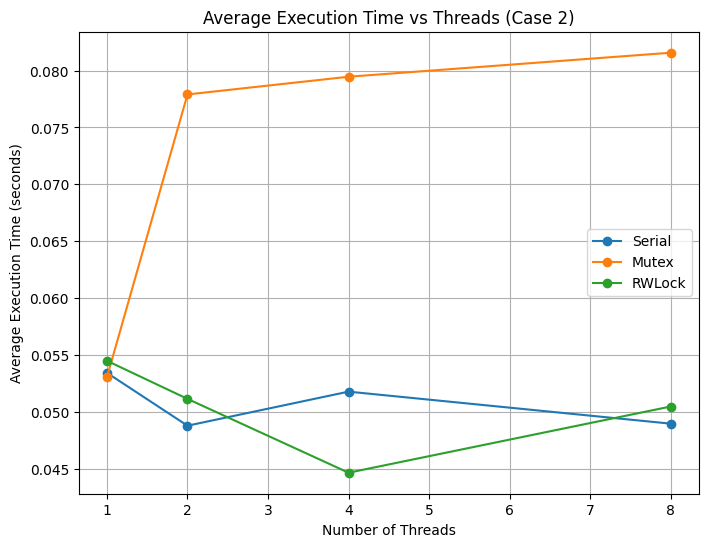

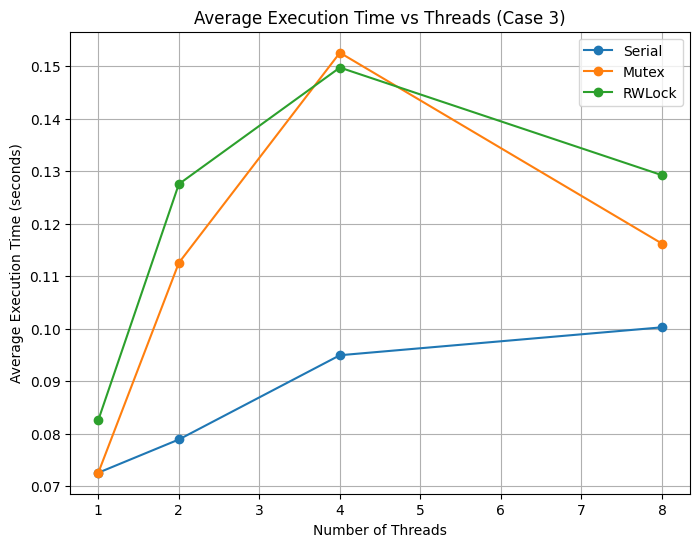

In [21]:
import matplotlib.pyplot as plt

# Create a function to plot for each case
def plot_average_execution_time(loaded_results, thread_counts, case_index):
    plt.figure(figsize=(8, 6))

    # Extract the average times for the current case
    serial_avg = loaded_results['Serial']['avg'][case_index]
    mutex_avg = loaded_results['Mutex']['avg'][case_index]
    rwlock_avg = loaded_results['RWLock']['avg'][case_index]

    # Plot Serial, Mutex, and RWLock averages against number of threads
    plt.plot(thread_counts, serial_avg, label="Serial", marker='o')
    plt.plot(thread_counts, mutex_avg, label="Mutex", marker='o')
    plt.plot(thread_counts, rwlock_avg, label="RWLock", marker='o')

    # Add labels, title, and legend
    plt.xlabel("Number of Threads")
    plt.ylabel("Average Execution Time (seconds)")
    plt.title(f"Average Execution Time vs Threads (Case {case_index + 1})")
    plt.legend()

    # Display the plot
    plt.grid(True)
    plt.show()

# Plot for all three cases
for case_index in range(3):
    plot_average_execution_time(loaded_results, thread_counts, case_index)



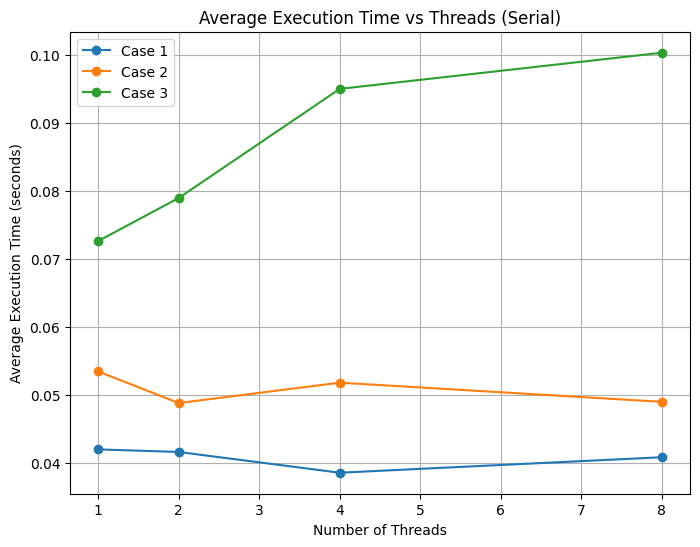

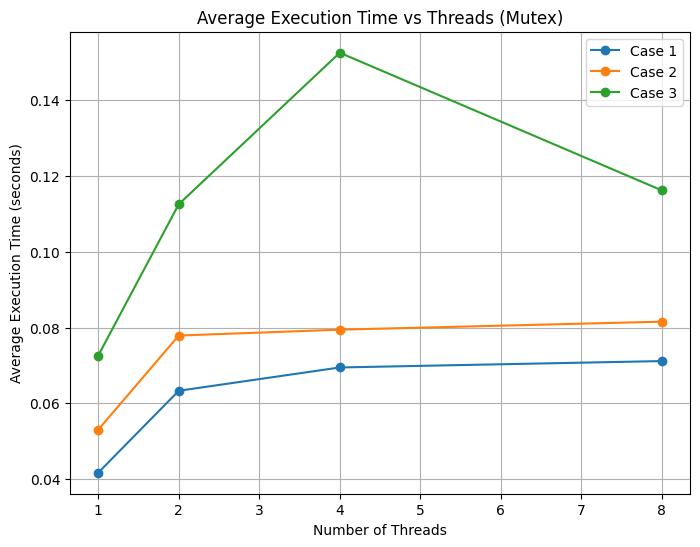

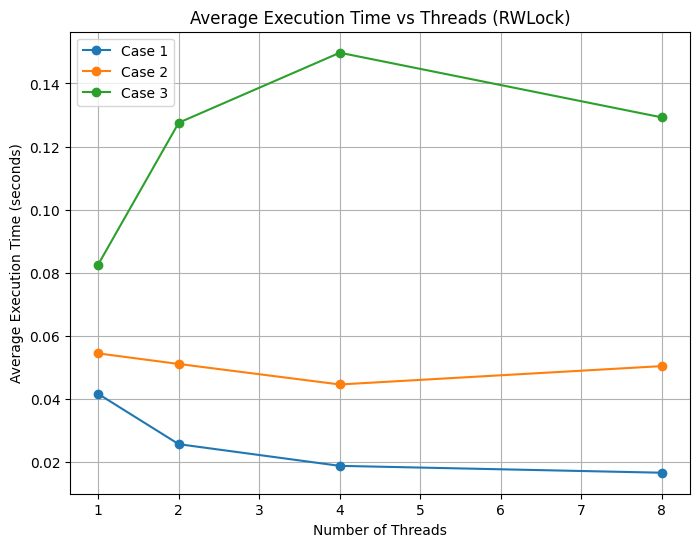

In [22]:
import matplotlib.pyplot as plt

# Create a function to plot for each method
def plot_method_execution_time(loaded_results, thread_counts, method):
    plt.figure(figsize=(8, 6))

    # Extract the average times for each case for the given method
    case1_avg = loaded_results[method]['avg'][0]
    case2_avg = loaded_results[method]['avg'][1]
    case3_avg = loaded_results[method]['avg'][2]

    # Plot case1, case2, and case3 averages against number of threads
    plt.plot(thread_counts, case1_avg, label="Case 1", marker='o')
    plt.plot(thread_counts, case2_avg, label="Case 2", marker='o')
    plt.plot(thread_counts, case3_avg, label="Case 3", marker='o')

    # Add labels, title, and legend
    plt.xlabel("Number of Threads")
    plt.ylabel("Average Execution Time (seconds)")
    plt.title(f"Average Execution Time vs Threads ({method})")
    plt.legend()

    # Display the plot
    plt.grid(True)
    plt.show()

# Plot for each method (Serial, Mutex, RWLock)
methods = ["Serial", "Mutex", "RWLock"]
for method in methods:
    plot_method_execution_time(loaded_results, thread_counts, method)
